In [5]:
from SPCCT_4D import Sample, Timepoint, Viewer, vesselDiameter
# Calling the bunny army
#s1 = Sample(1)
#s2 = Sample(2)
#s3 = Sample(3)
#s4 = Sample(4)
#s6 = Sample(6)


d1 = Sample("dotarem1")
d2 = Sample("dotarem2")
d3 = Sample("dotarem3")
d4 = Sample("dotarem4")
d5 = Sample("dotarem5")
d6 = Sample("dotarem6")



#s9 = Sample(9)

Available directories:
0: 2021_01_18.4500.200.2021_01_22.RABJAN00014
1: 2021_01_18.4500.300.2021_01_22.RABJAN00015
2: 2021_01_18.4500.400.2021_01_22.RABJAN00016
3: 2021_01_18.4500.500.2021_01_22.RABJAN00017
4: 2021_01_18.4500.600.2021_01_22.RABJAN00018
5: 2021_01_18.4500.700.2021_01_22.RABJAN00019
Conventional file 1 total DICOM files found: 480
No DICOM files found in D:\copyRaw\Rabbit_AGUIX_dotarem1\2021_01_18.4500.200.2021_01_22.RABJAN00014\Spectral\k_gadolinium.
Conventional file 2 total DICOM files found: 480
No DICOM files found in D:\copyRaw\Rabbit_AGUIX_dotarem1\2021_01_18.4500.300.2021_01_22.RABJAN00015\Spectral\k_gadolinium.
Conventional file 3 total DICOM files found: 240
No DICOM files found in D:\copyRaw\Rabbit_AGUIX_dotarem1\2021_01_18.4500.400.2021_01_22.RABJAN00016\Spectral\k_gadolinium.
Conventional file 4 total DICOM files found: 240
No DICOM files found in D:\copyRaw\Rabbit_AGUIX_dotarem1\2021_01_18.4500.500.2021_01_22.RABJAN00017\Spectral\k_gadolinium.
Conventional 

In [18]:
import pydicom
#file_path = "D://copyRaw//Rabbit_AGUIX_1//2021_01_25.4531.300.2024_03_17.AGUIX_Rabbit_26201_h00000//Conventional//dcm//0294.dcm"

file_path = "D://copyRaw//Rabbit_AGUIX_dotarem2//2021_01_19.4502.500.2021_01_22.RABJAN00031//Conventional//dcm//0240.dcm"
medical_image = pydicom.read_file(file_path)
print(medical_image)

print(d6.acquisition[1].kedge)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113704.1.176244555.18446744072229114582.7397.17979.242
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20210123'
(0008, 0013) Instance Creation Time              TM: '165226'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) 

c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\stageM2\Lib\site-packages\pydicom\valuerep.py:443: UserWarning: The value length (26) exceeds the maximum length of 16 allowed for VR SH.
  warnings.warn(msg)


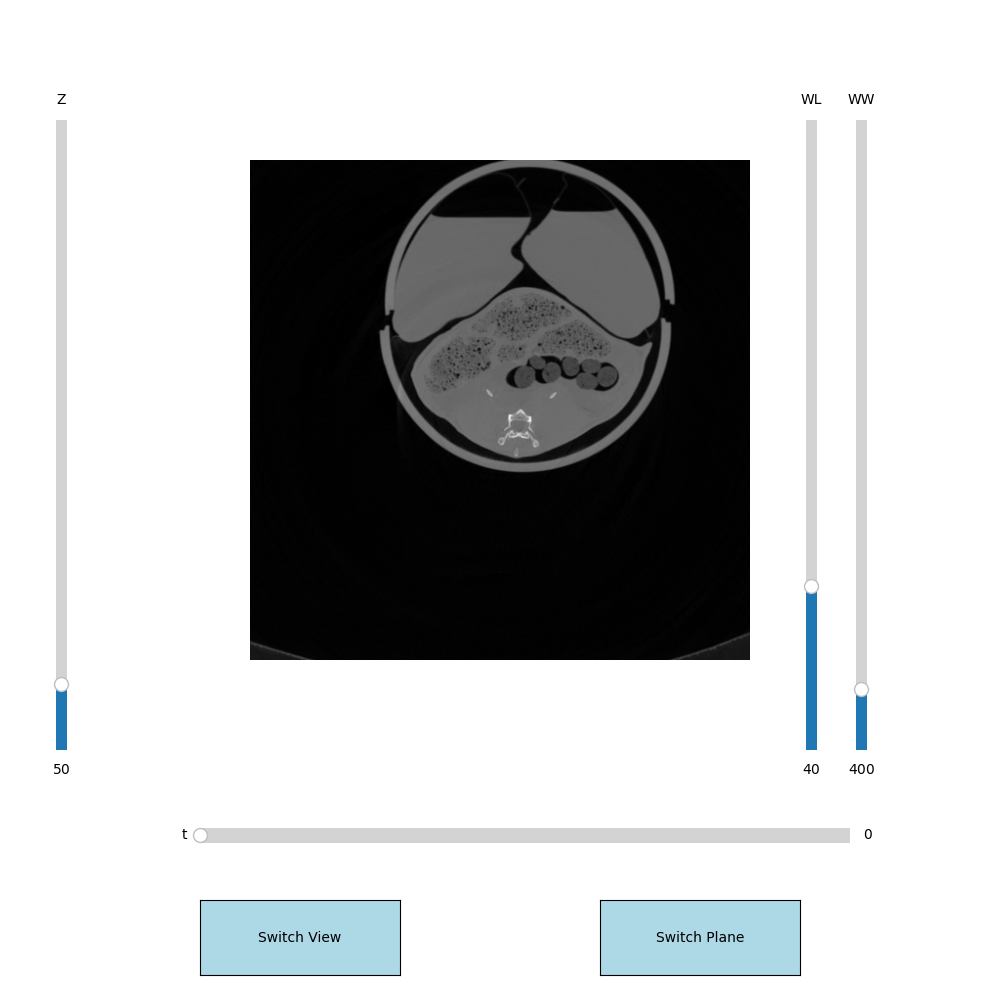

In [19]:
%matplotlib widget
viewS4 = Viewer(d6)
#s1.acquisition


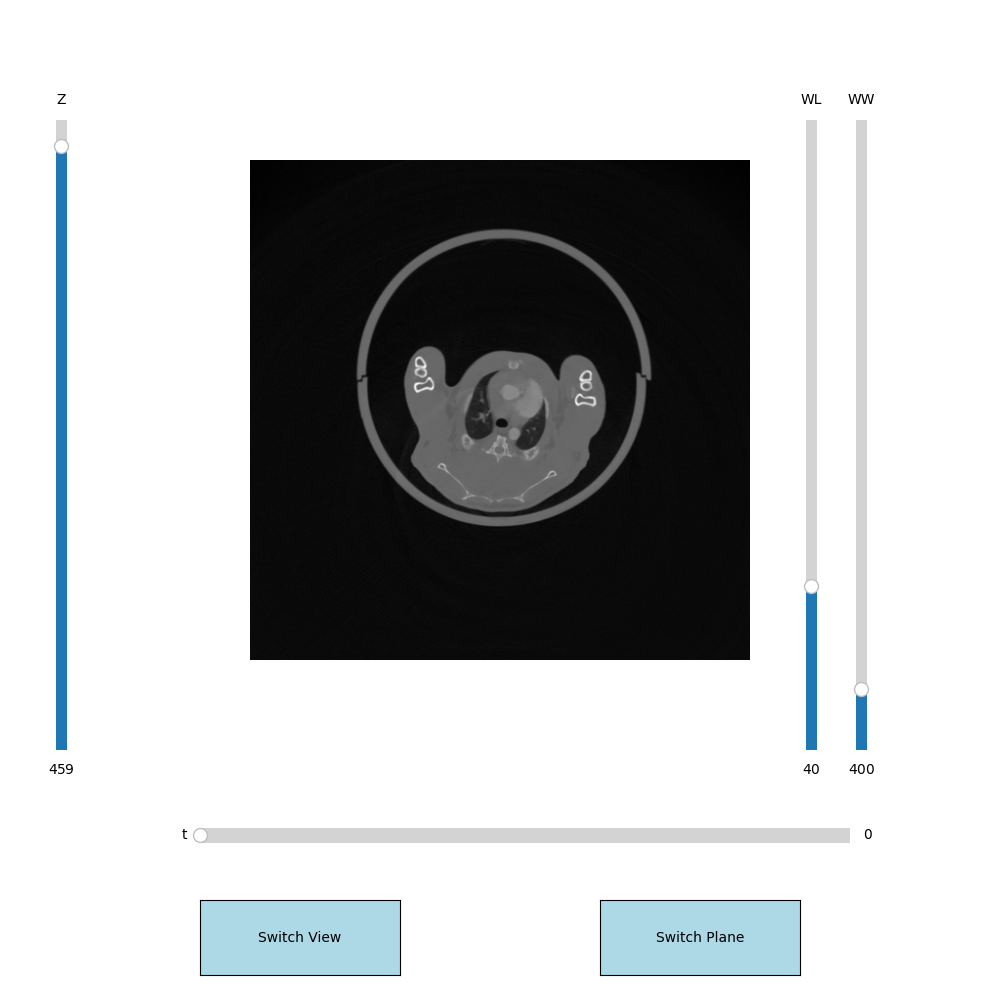

In [41]:
from SPCCT_4D import vesselDiameter
%matplotlib widget
samp = s1
#vesselDiameter(samp, "Masks\\IVC_s4_292_t1.npy")
vesselDiameter(samp, "Masks\\SAA_s1_459.npy")


#vesselDiameter(samp, None)


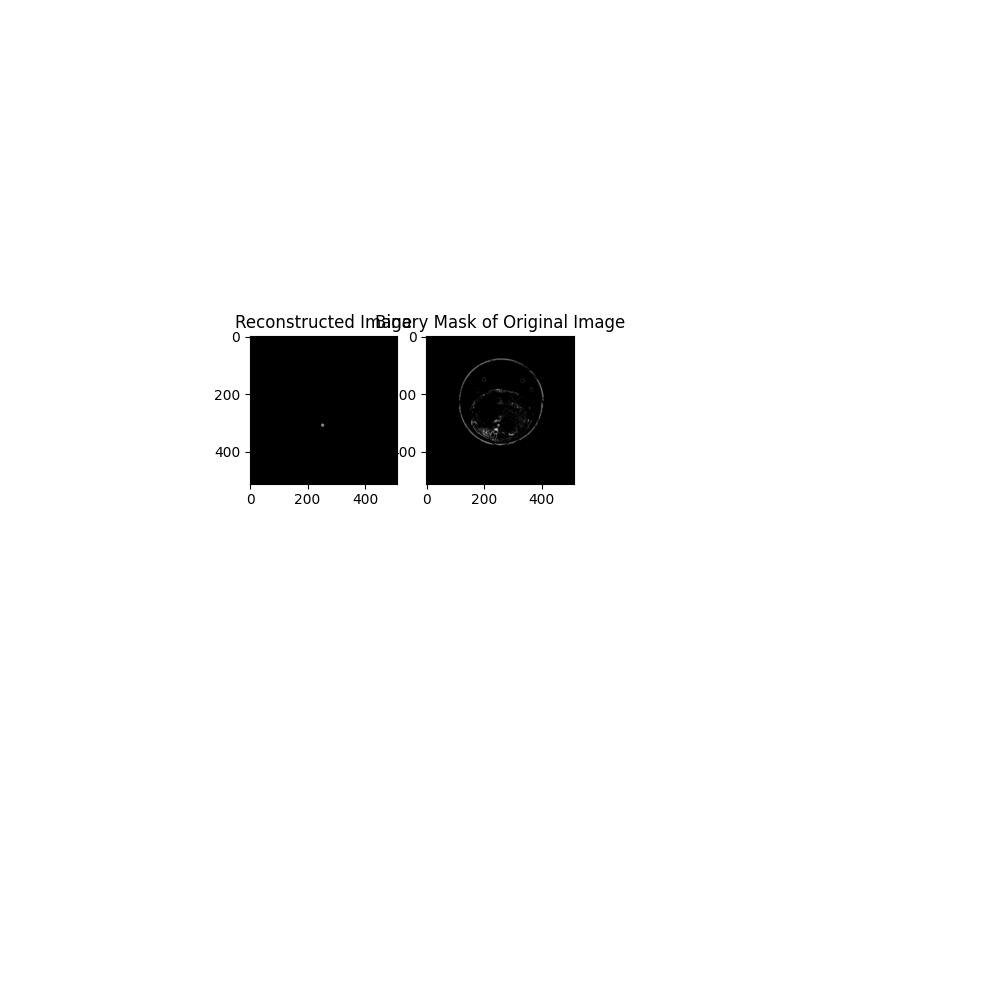

(131, 2)


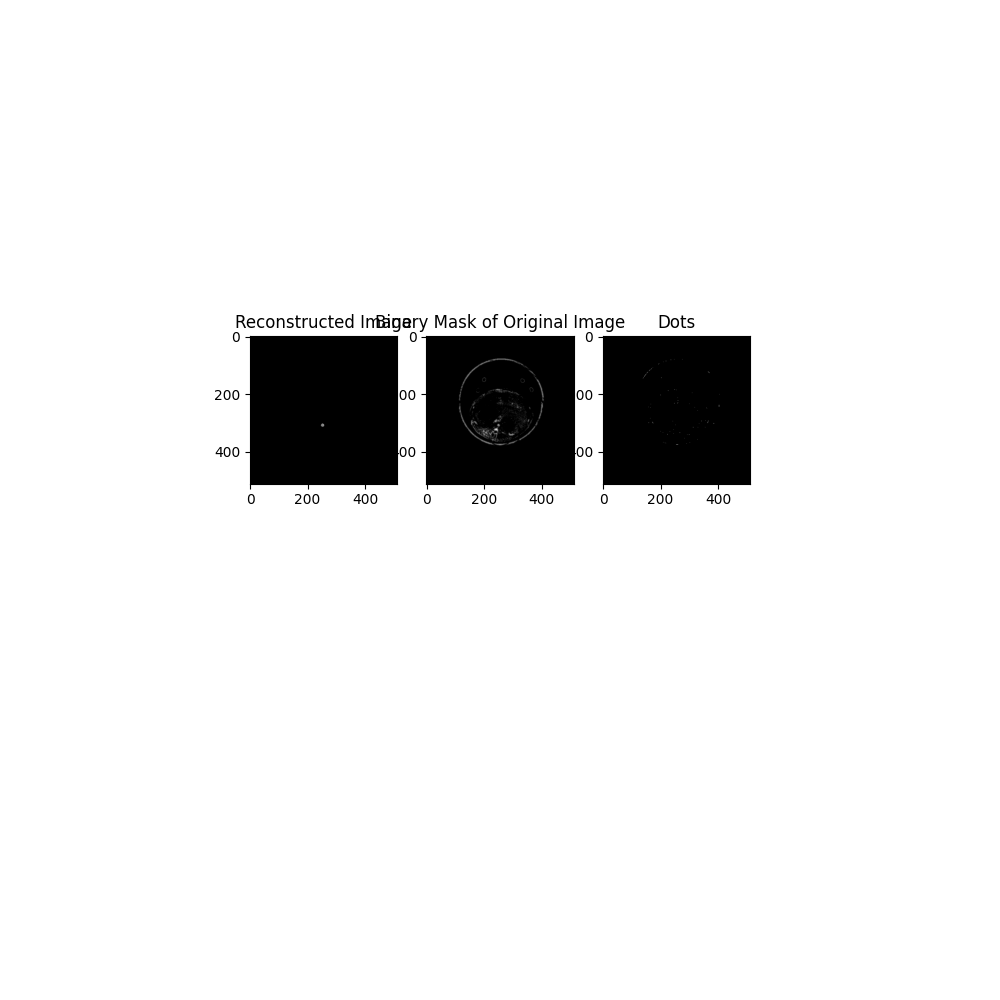

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology as MM
import scipy.ndimage as ndi

start = s1.acquisition[1].conventional[:,:,459]
start_mask = np.load("Masks\\SAA_s1_459.npy")

stop = s1.acquisition[1].conventional[:,:,241]
stop_mask = np.load("Masks\\IRA_s1_241.npy")

#start_mask = np.all(start_mask == [1, 0, 0, 0.5], axis=-1)
#start_mask = start_mask.astype(int)

#stop_mask = np.all(stop_mask == [1, 0, 0, 0.5], axis=-1)
#stop_mask = stop_mask.astype(int)

def greyscale_mask(mask):
    to3D = np.all(mask == [1,0,0,0.5], axis = -1)
    to3D = to3D.astype(int)
    return to3D

def generate_marker_from_coords(shape, coordinates):
    marker = np.zeros(shape)
    marker[coordinates[:, 0], coordinates[:, 1]] = True
    return marker

#edt = ndi.distance_transform_edt(to3D)
    #maxima = MM.h_maxima(edt, 2)
    #coordinates = np.where(maxima == 1)
    #print(coordinates[0])
    #coordinates = np.asarray(coordinates).T
    #print(coordinates[0])
plt.clf()
plt.subplot(1, 3, 1)
plt.imshow(greyscale_mask(start_mask)*start, cmap='gray')
plt.title("Reconstructed Image")

nxt = s1.acquisition[1].conventional[:,:,458]
binary_start = nxt > np.percentile(nxt, 95)
edt = ndi.distance_transform_edt(binary_start)

coords = MM.h_maxima(edt, 2)
coordinates = np.where(coords == 1)
coordinates = np.asarray(coordinates).T

dotplot = generate_marker_from_coords(start.shape, coordinates)


plt.subplot(1, 3, 2)
plt.imshow(edt, cmap='gray')
plt.title("Binary Mask of Original Image")
plt.show()
print(coordinates.shape)

plt.subplot(1,3,3)
plt.imshow(dotplot, cmap = "gray")
plt.title("Dots")
plt.show()


In [ ]:
# vessel3D class(self, sample, list of mask strings (n=2))

# function that determines and stores centroid coordinates of manually segmented masks at the appropriate slice of the 3d stack

# function that takes the next slice and performs a euclidean distance transform and a hmaxima to extract the coordinates of maxima in my images
# it should compare the current slice iteration to the previous slice and choose the maxima that has the lowest distance

